In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(256, 256)


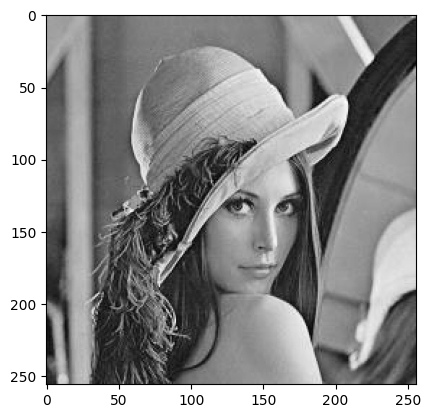

In [40]:
img = cv2.imread('../images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

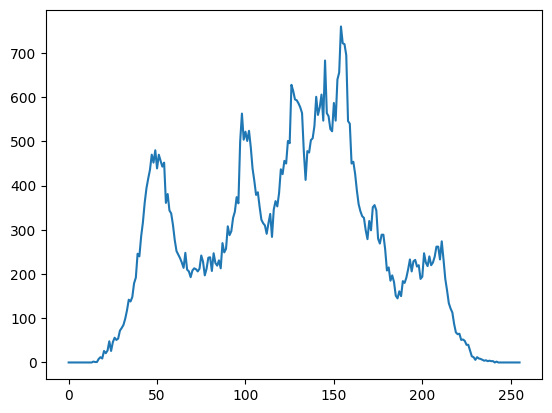

In [41]:
hist = cv2.calcHist([gImg], [0], None, [256], [0, 256])
plt.plot(hist)

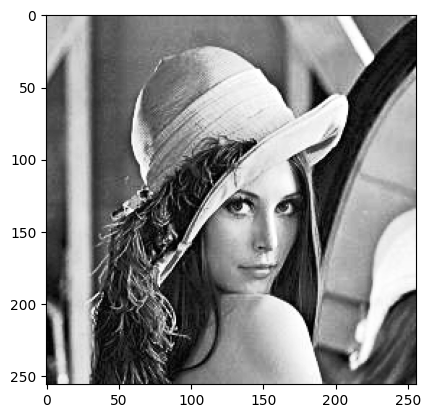

In [42]:
gOut = cv2.equalizeHist(gImg)
plt.imshow(gOut, cmap='gray')

# 히스토그램 ( 평활화 적용 되어있음 )

(256, 1)


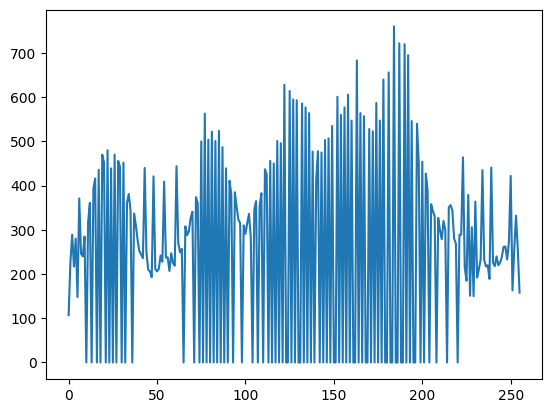

In [43]:
hist = cv2.calcHist([gOut], [0], None, [256], [0, 256])
plt.plot(hist)
print(hist.shape)

# 누적합 그래프

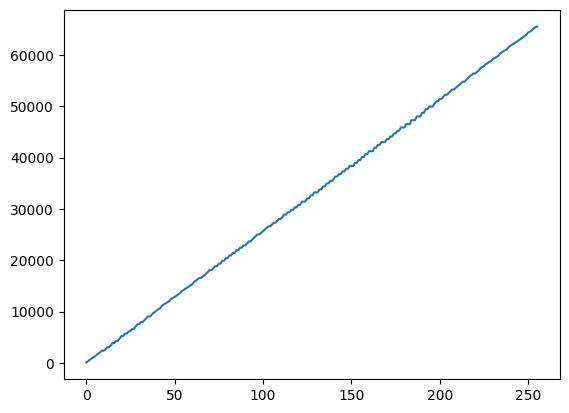

In [44]:
cumulHist = hist.copy()
for i in range(1, 256):
    cumulHist[i] = cumulHist[i - 1] + cumulHist[i]
plt.plot(cumulHist)

# 1. 히스토그램 가져오기

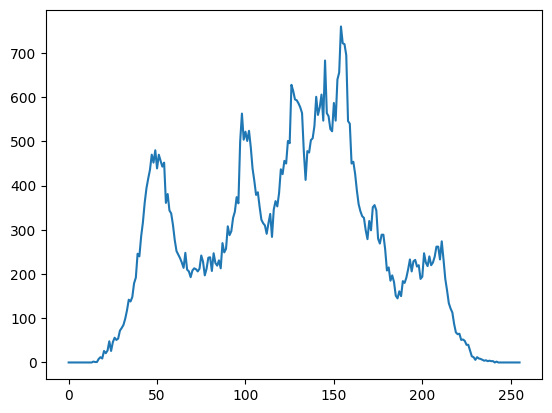

In [45]:
hist = cv2.calcHist([gImg], [0], None, [256], [0, 256])
plt.plot(hist)

# 2. 누적합 히스토그램 구하기

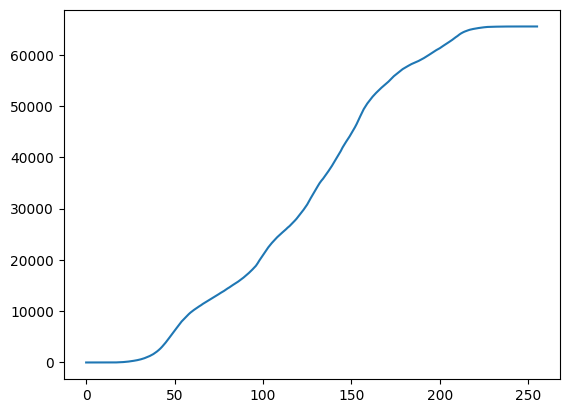

In [46]:
cumulHist = hist.copy()
for i in range(1, 256):
    cumulHist[i] = cumulHist[i - 1] + cumulHist[i]
plt.plot(cumulHist)

# 3. 누적합으로 나누기

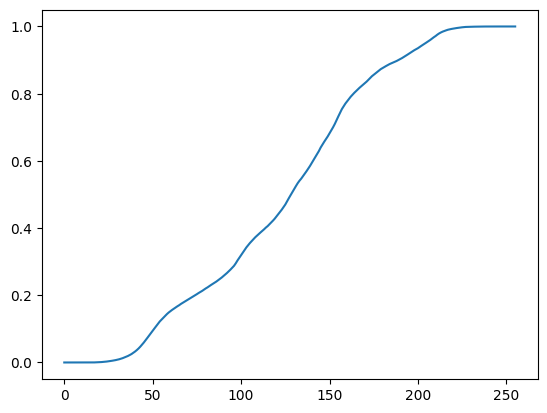

In [47]:
equalHist = cumulHist.copy()
numOfPixels = np.int32(gImg.shape[0] * gImg.shape[1])
equalHist = equalHist / numOfPixels
plt.plot(equalHist)

# 4. 총 픽셀값을 곱한다

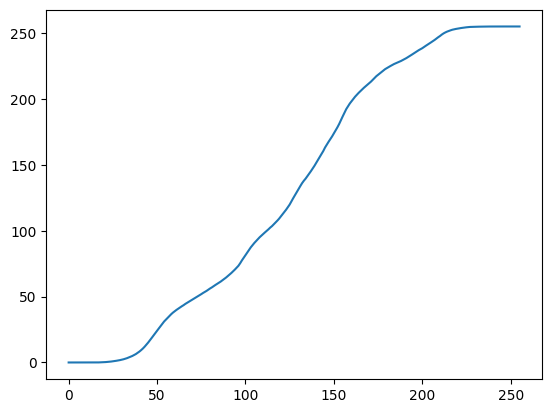

In [48]:
equalHist = equalHist * 255
plt.plot(equalHist)

# 5. 반올림 해준다

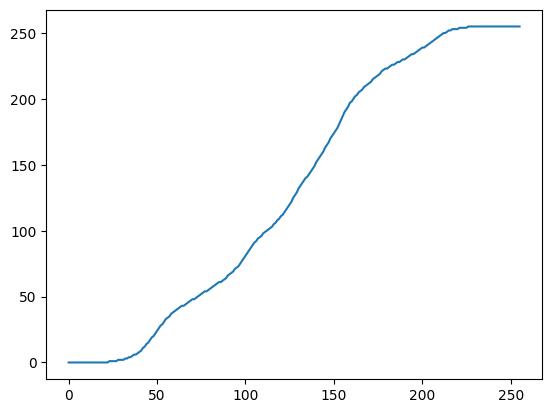

In [49]:
equalHist = np.round(equalHist)
plt.plot(equalHist)

# 6. 마지막 알고리즘 적용 - 평활화

/var/folders/5x/qyhn_rn57c1ckbjg691620fw0000gp/T/ipykernel_45356/4056798405.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gOut[h, w] = equalHist[gImg[h, w]]


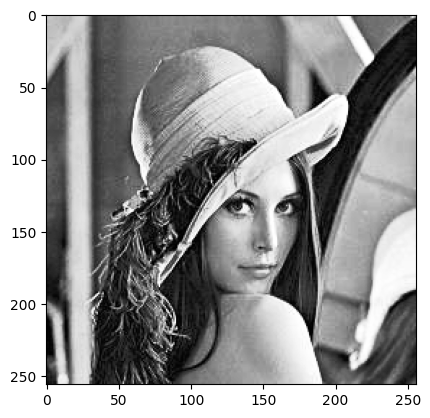

In [50]:
gOut = gImg.copy()

for h in range(gImg.shape[0]):
    for w in range(gImg.shape[1]):
        gOut[h, w] = equalHist[gImg[h, w]]

plt.imshow(gOut, cmap='gray')